In [1]:
import pandas as pd

In [2]:
d = pd.read_csv('users.csv', nrows=10000)
print(d.info())
print(d.groupby('identified_as_person').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
uid                                    10000 non-null int64
name                                   9998 non-null object
profile_image_url                      10000 non-null object
location                               5292 non-null object
created_at                             10000 non-null object
favourites_count                       10000 non-null int64
utc_offset                             3851 non-null float64
profile_use_background_image           10000 non-null object
lang                                   10000 non-null object
followers_count                        10000 non-null int64
protected                              10000 non-null object
geo_enabled                            10000 non-null object
description                            5398 non-null object
verified                               10000 non-null object
notifications                          0 non

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Remove any row that has NaN value
data = d[(d.favourites_count.notnull()) & (d.followers_count.notnull()) & 
            (d.friends_count.notnull()) & (d.numberoftweets.notnull()) & 
            (d.statuses_count.notnull()) & (d.percentoftweetsinwork.notnull()) & 
            (d.percentoftweetsinweekend.notnull()) & (d.percentoftweetsinday.notnull()) & 
            (d.percentoftweetsinnight.notnull())]


def plot_trimmed_data(data, field):
    SIGMA = 2

    raw = pd.DataFrame(data[[field, 'identified_as_person']])
    
    #keep only the ones that are within +SIGMA to -SIGMA standard deviations
    trimmed = raw[np.abs(raw[field]-raw[field].mean())<=(SIGMA*raw[field].std())] 
    

    fig, (ax1, ax2) = plt.subplots(1, 2)
    groups = raw.groupby('identified_as_person')[field]
    for k, v in groups:
        v.hist(label='a', alpha=.7, ax=ax1, bottom=1, bins=50)

    ax1.set_title('%s (raw data)' % field)
    ax1.legend(['Not person', 'Person'])
    ax1.set_yscale('log')

    groups = trimmed.groupby('identified_as_person')[field]
    for k, v in groups:
        v.hist(label='a', alpha=.7, ax=ax2, bottom=1, bins=50)

    rm_count = raw.shape[0] - trimmed.shape[0]
    ax2.set_title(r'%s ($\pm %s \sigma$, %s out of %s removed)' % (field, SIGMA, rm_count, raw.shape[0]))
    ax2.legend(['Not person', 'Person'])
    ax2.set_yscale('log')


<IPython.core.display.Javascript object>


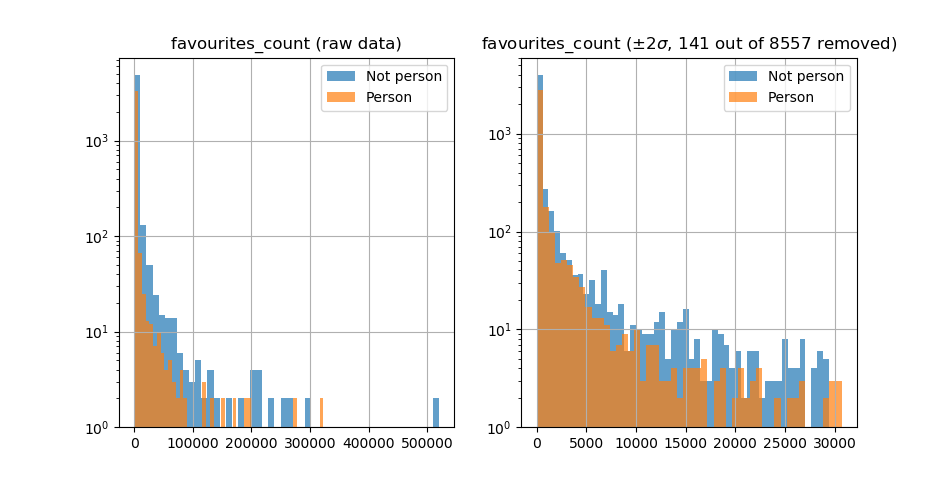

In [4]:
plot_trimmed_data(data, 'favourites_count')

<IPython.core.display.Javascript object>


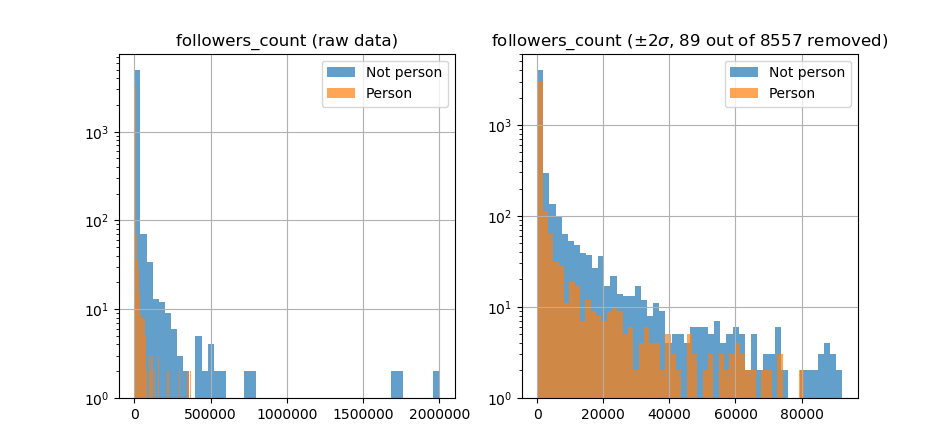

In [5]:
plot_trimmed_data(data, 'followers_count')

<IPython.core.display.Javascript object>


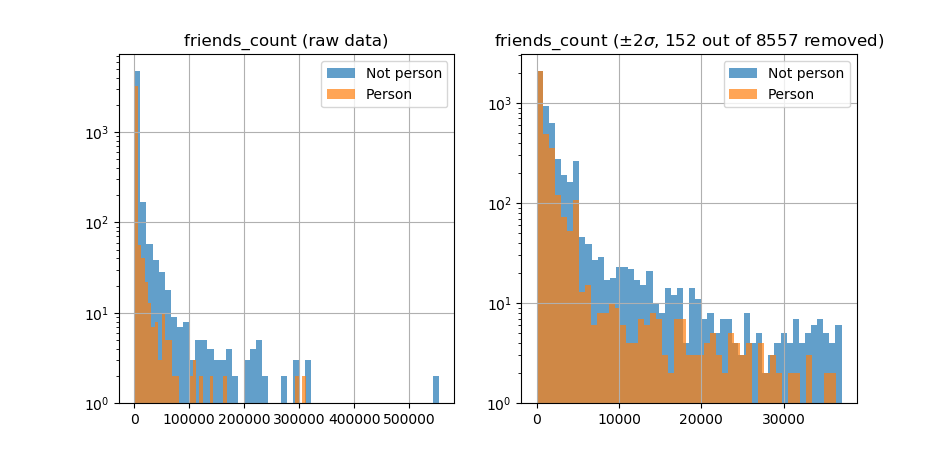

In [6]:
plot_trimmed_data(data, 'friends_count')

<IPython.core.display.Javascript object>


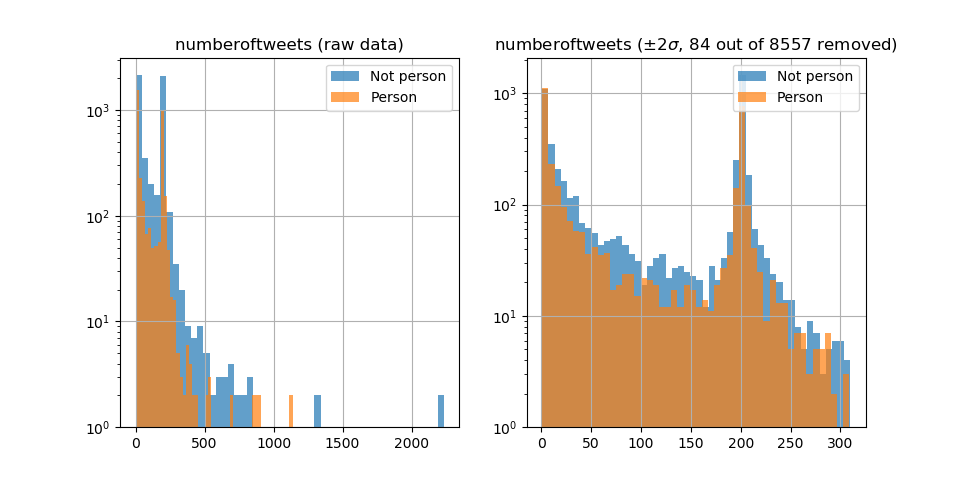

In [7]:
plot_trimmed_data(data, 'numberoftweets')

<IPython.core.display.Javascript object>


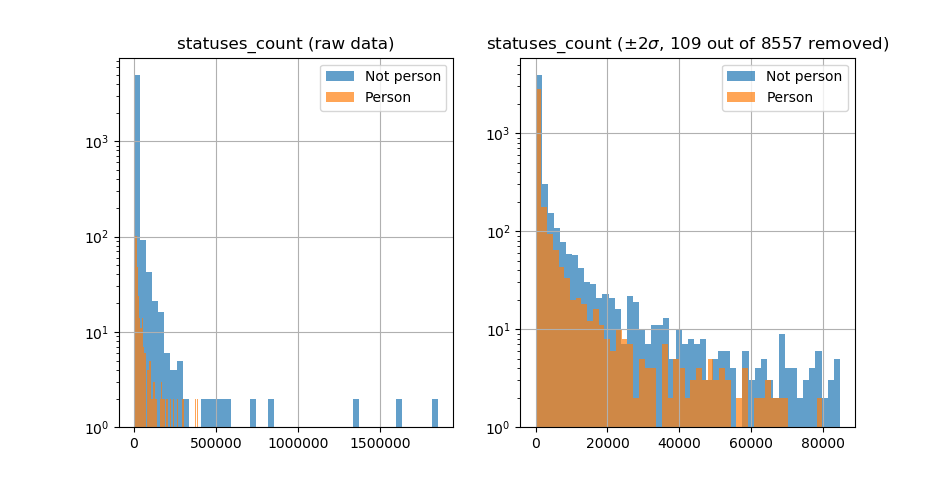

In [8]:
plot_trimmed_data(data, 'statuses_count')

<IPython.core.display.Javascript object>


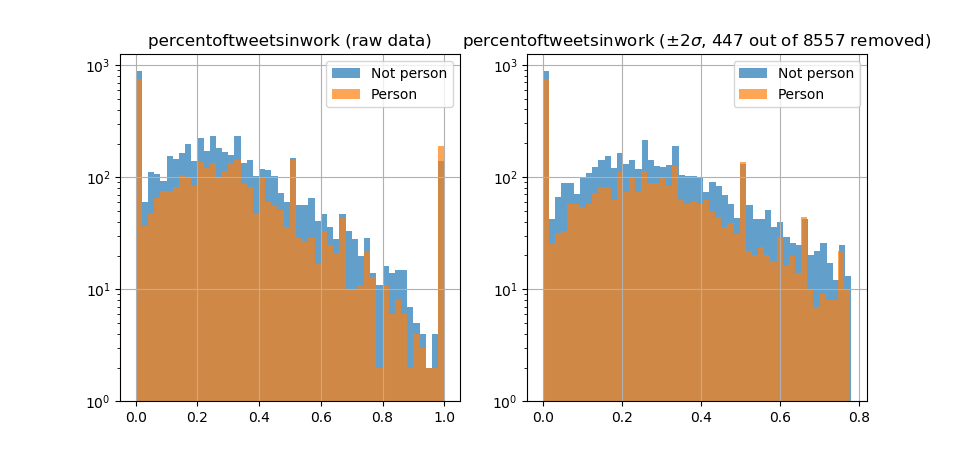

In [9]:
plot_trimmed_data(data, 'percentoftweetsinwork')

<IPython.core.display.Javascript object>


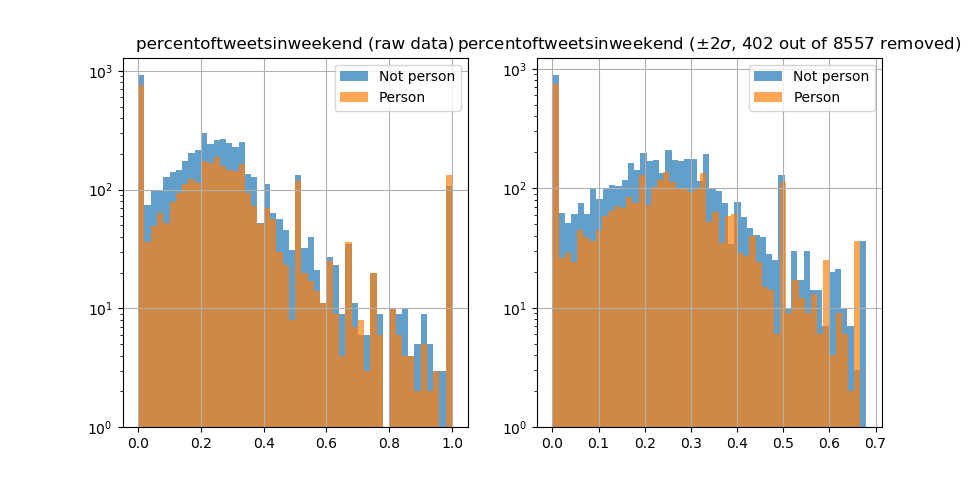

In [10]:
plot_trimmed_data(data, 'percentoftweetsinweekend')

<IPython.core.display.Javascript object>


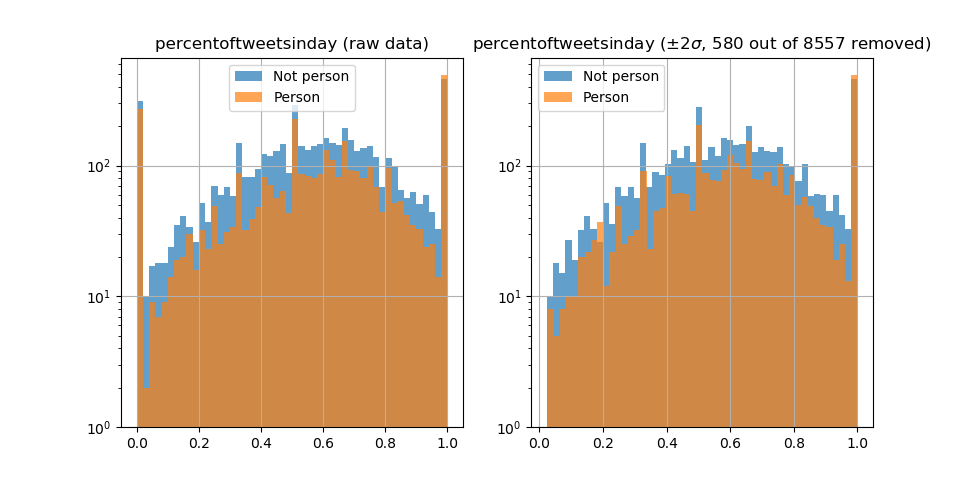

In [11]:
plot_trimmed_data(data, 'percentoftweetsinday')

<IPython.core.display.Javascript object>


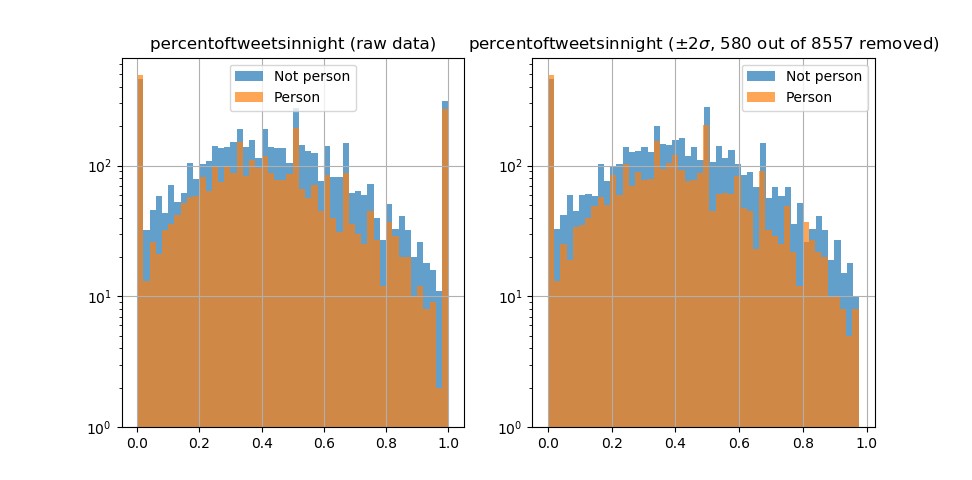

In [12]:
plot_trimmed_data(data, 'percentoftweetsinnight')

<IPython.core.display.Javascript object>


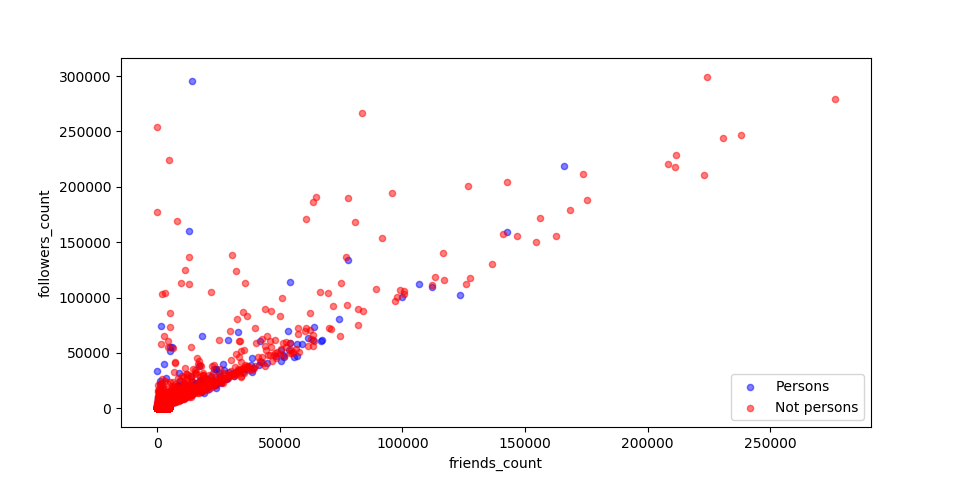

In [13]:
# Check friends_count around 5000
persons = data[(data.identified_as_person=='t') & (data.followers_count<300000) & (data.friends_count<300000)]
not_persons = data[(data.identified_as_person=='f') & (data.followers_count<300000) & (data.friends_count<300000)]

ax = persons.plot.scatter(x='friends_count', y='followers_count', color='blue', label="Persons", alpha=.5)
not_persons.plot.scatter(x='friends_count', y='followers_count', color='red', label="Not persons", ax=ax, alpha=.5)

<IPython.core.display.Javascript object>


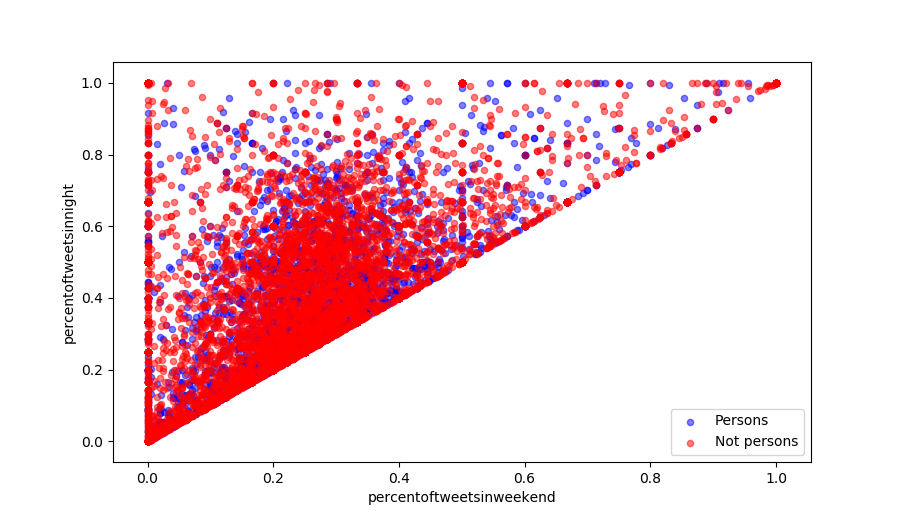

In [14]:
persons = data[(data.identified_as_person=='t')]
not_persons = data[(data.identified_as_person=='f')]

ax = persons.plot.scatter(x='percentoftweetsinweekend', y='percentoftweetsinnight', color='blue', label="Persons", alpha=.5)
not_persons.plot.scatter(x='percentoftweetsinweekend', y='percentoftweetsinnight', color='red', label="Not persons", ax=ax, alpha=.5)

<IPython.core.display.Javascript object>


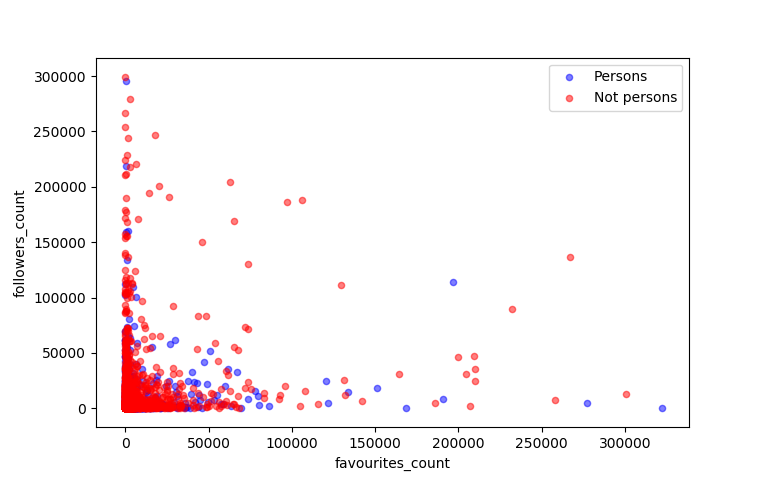

In [15]:
persons = data[(data.identified_as_person=='t') & (data.followers_count<300000) & (data.friends_count<300000)]
not_persons = data[(data.identified_as_person=='f') & (data.followers_count<300000) & (data.friends_count<300000)]

ax = persons.plot.scatter(x='favourites_count', y='followers_count', color='blue', label="Persons", alpha=.5)
not_persons.plot.scatter(x='favourites_count', y='followers_count', color='red', label="Not persons", ax=ax, alpha=.5)

In [16]:
# Filter and split data to training/test sets
import numpy as np
from sklearn.cross_validation import train_test_split


quant = 0.95
fields = ['favourites_count', 'followers_count', 'statuses_count', 'friends_count', 'numberoftweets']

ml_data = pd.DataFrame(data)

# print(ml_data.shape)

# Remove top 5% of samples from following columns
for field in fields:
    upper_q = ml_data[field].quantile(quant)
#     lower_q = ml_data[field].quantile(1 - quant)
    ml_data = ml_data[(ml_data[field] < upper_q)] #& (ml_data[field] > lower_q)]
    
ml_data = ml_data[fields + ['percentoftweetsinwork', 'percentoftweetsinweekend', 
                            'percentoftweetsinday', 'percentoftweetsinnight', 
                            'identified_as_person']]

# print(ml_data.groupby('identified_as_person').size())
# print(ml_data.shape)

train_set, test_set = train_test_split(ml_data.values, train_size = 0.8)
train_x, train_y = train_set[:, 0:9], train_set[:, 9:10]
test_x, test_y = test_set[:, 0:9], test_set[:, 9:10]

train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

/home/tahion/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# Data scaling 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

# min_max = MinMaxScaler()
# train_x = min_max.fit_transform(train_x)
# test_x = min_max.fit_transform(test_x)

train_x = scale(train_x)
test_x = scale(test_x)

/home/tahion/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


<IPython.core.display.Javascript object>


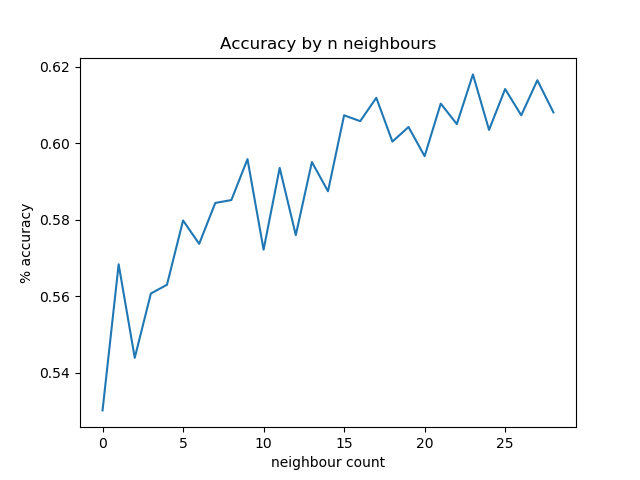

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

scores = list()
x = range(1, 30)

for n in x:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x, train_y)
    acc = accuracy_score(test_y, knn.predict(test_x))
    scores.append(acc)
    
plt.plot(scores)
plt.title("Accuracy by n neighbours")
plt.xlabel("neighbour count")
plt.ylabel("% accuracy")
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l2', C=.01)
log.fit(train_x, train_y)
acc = accuracy_score(test_y, log.predict(test_x))

print(acc)

0.615737203972


In [20]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(train_x, train_y)
acc = accuracy_score(test_y, sgd.predict(test_x))

print(acc)

0.580595874714


/home/tahion/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [21]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_x, train_y) 
acc = accuracy_score(test_y, svm.predict(test_x))

print(acc)

0.614973262032


In [22]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree.fit(train_x, train_y)
acc = accuracy_score(test_y, dtree.predict(test_x))

print(acc)

0.5179526356
